# K-Means Clustering

In [54]:
# Import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
# Import the dataset

dataset=pd.read_csv('Mall_Customers.csv')
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [56]:
#For visualization convenience, we take Annual Income and Spending score as our data.

X = dataset.iloc[:, [3, 4]].values

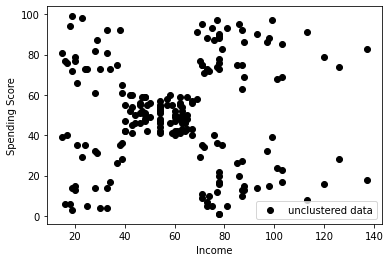

In [57]:
# Visualizing the dataset

plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [58]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'random', random_state = 42)
kmeans = kmeans.fit(X)

In [ ]:
# The lowest SSE value
kmeans.inertia_

106348.37306211118

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

9

In [ ]:
y_kmeans = kmeans.fit_predict(X)

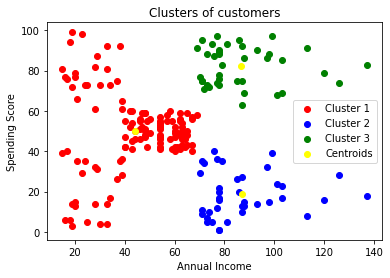

In [ ]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

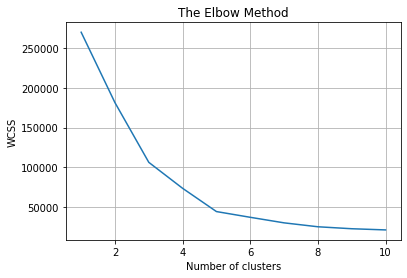

In [ ]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [ ]:
# Fitting K-Means++ to the dataset

kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans1 =kmeans1.fit(X)

In [ ]:
print('SSE Value is',kmeans1.inertia_)
print('Iterartions required to converge', kmeans1.n_iter_)

SSE Value is 44448.45544793371
Iterartions required to converge 4


In [ ]:
y_kmeans1 = kmeans1.fit_predict(X)
#y_kmeans1

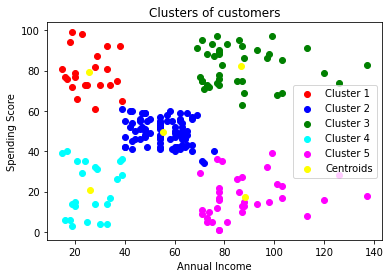

In [ ]:
# Visualising the clusters
plt.scatter(X[y_kmeans1 == 0, 0], X[y_kmeans1 == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans1 == 1, 0], X[y_kmeans1 == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans1 == 2, 0], X[y_kmeans1 == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans1 == 3, 0], X[y_kmeans1 == 3, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans1 == 4, 0], X[y_kmeans1 == 4, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()